Overfitting to see if network is training
================

We try to train small spots of our dataset for getting overfitting. After we see this is working, we can train "the whole" data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from code.data_utils import load_mammography_data
from splitting import split_data

* One image 

In [2]:
train_data = load_mammography_data('data/train.txt')
val_data = load_mammography_data('data/val.txt')
test_data = load_mammography_data('data/test.txt')

train_data_one = [train_data[0]]
val_data_one = [val_data[0]]

print("Train size: %i" % len(train_data_one))
print("Val size: %i" % len(val_data_one))

Train size: 1
Val size: 1


Training the network with this smaller dataset

In [3]:
from code.classifiers.classification_mammograms import ClassificationMammograms
from code.solver import Solver

best_model = None

num_epochs = 20
batch_size = [32]

learning_rates = [1e-4]

for batch in batch_size:
    train_loader = torch.utils.data.DataLoader(train_data_one, batch_size=batch, shuffle=True, num_workers=1)
    val_loader = torch.utils.data.DataLoader(train_data_one, batch_size=batch, shuffle=False, num_workers=1)
    for lr in learning_rates:
        model = ClassificationMammograms()
        solver = Solver(optim_args={"lr": lr, 
                                        #"betas": (0.9, 0.999),
                                        #"eps": 1e-8,
                                        "weight_decay": 0.0})

        solver.train(model, train_loader, val_loader, log_nth=1000, num_epochs=num_epochs)
        print(lr,batch)
            


START TRAIN.
[Epoch 1/20] TRAIN loss: 11.614035606384277, acc: 0.0
[Epoch 1/20] VAL loss: 7.718297958374023, acc: 0.0
[Epoch 2/20] TRAIN loss: 7.8325581550598145, acc: 0.0
[Epoch 2/20] VAL loss: 5.607721328735352, acc: 0.0
[Epoch 3/20] TRAIN loss: 5.8033952713012695, acc: 0.0
[Epoch 3/20] VAL loss: 3.8371715545654297, acc: 0.0
[Epoch 4/20] TRAIN loss: 4.378302574157715, acc: 0.0
[Epoch 4/20] VAL loss: 2.164914131164551, acc: 1.0
[Epoch 5/20] TRAIN loss: 2.1272096633911133, acc: 1.0
[Epoch 5/20] VAL loss: 0.6972723007202148, acc: 1.0
[Epoch 6/20] TRAIN loss: 0.6813850402832031, acc: 1.0
[Epoch 6/20] VAL loss: 0.09765815734863281, acc: 1.0
[Epoch 7/20] TRAIN loss: 0.042877197265625, acc: 1.0
[Epoch 7/20] VAL loss: 0.0153045654296875, acc: 1.0
[Epoch 8/20] TRAIN loss: 0.016193389892578125, acc: 1.0
[Epoch 8/20] VAL loss: 0.0031147003173828125, acc: 1.0
[Epoch 9/20] TRAIN loss: 0.002742767333984375, acc: 1.0
[Epoch 9/20] VAL loss: 0.0006809234619140625, acc: 1.0
[Epoch 10/20] TRAIN loss: 0

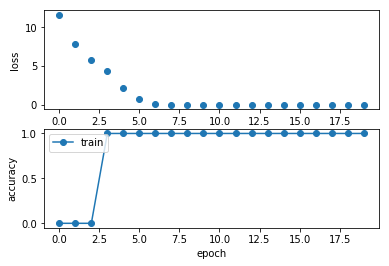

In [4]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
#plt.plot(solver.val_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
#plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* Ten images

In [5]:
train_data = load_mammography_data('data/train.txt')
val_data = load_mammography_data('data/val.txt')
test_data = load_mammography_data('data/test.txt')

train_data_ten = train_data[0:10]
val_data_ten = val_data[0:10]

print("Train size: %i" % len(train_data_ten))
print("Val size: %i" % len(val_data_ten))

Train size: 10
Val size: 10


In [6]:
from code.classifiers.classification_mammograms import ClassificationMammograms
from code.solver import Solver

best_model = None

num_epochs = 20
batch_size = [32]

learning_rates = [1e-4]

for batch in batch_size:
    train_loader = torch.utils.data.DataLoader(train_data_ten, batch_size=batch, shuffle=True, num_workers=1)
    val_loader = torch.utils.data.DataLoader(train_data_ten, batch_size=batch, shuffle=False, num_workers=1)
    for lr in learning_rates:
        model = ClassificationMammograms()
        solver = Solver(optim_args={"lr": lr, 
                                        #"betas": (0.9, 0.999),
                                        #"eps": 1e-8,
                                        "weight_decay": 0.0})

        solver.train(model, train_loader, val_loader, log_nth=1000, num_epochs=num_epochs)
        print(lr,batch)
            


START TRAIN.
[Epoch 1/20] TRAIN loss: 8.933326721191406, acc: 0.0
[Epoch 1/20] VAL loss: 5.733364105224609, acc: 0.0
[Epoch 2/20] TRAIN loss: 5.917952537536621, acc: 0.0
[Epoch 2/20] VAL loss: 3.4290108680725098, acc: 0.2
[Epoch 3/20] TRAIN loss: 3.5883686542510986, acc: 0.2
[Epoch 3/20] VAL loss: 1.1548460721969604, acc: 1.0
[Epoch 4/20] TRAIN loss: 1.0803349018096924, acc: 1.0
[Epoch 4/20] VAL loss: 0.1037975326180458, acc: 1.0
[Epoch 5/20] TRAIN loss: 0.13298892974853516, acc: 1.0
[Epoch 5/20] VAL loss: 0.006242656614631414, acc: 1.0
[Epoch 6/20] TRAIN loss: 0.007832241244614124, acc: 1.0
[Epoch 6/20] VAL loss: 0.0005563736194744706, acc: 1.0
[Epoch 7/20] TRAIN loss: 0.0007574081537313759, acc: 1.0
[Epoch 7/20] VAL loss: 5.702972339349799e-05, acc: 1.0
[Epoch 8/20] TRAIN loss: 4.100799560546875e-05, acc: 1.0
[Epoch 8/20] VAL loss: 5.7220458984375e-06, acc: 1.0
[Epoch 9/20] TRAIN loss: 3.43322744811303e-06, acc: 1.0
[Epoch 9/20] VAL loss: 1.9073486612342094e-07, acc: 1.0
[Epoch 10/20

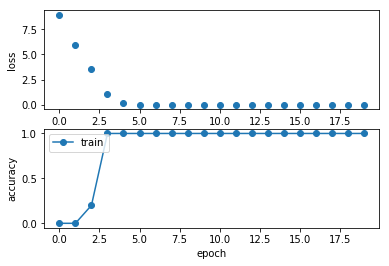

In [7]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
#plt.plot(solver.val_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
#plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()